In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../data/raw/volcano_data_2010.csv')

In [4]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

              Year      Month        Day   Latitude   Longitude    Elevation   
count    63.000000  63.000000  57.000000  63.000000   63.000000    63.000000  \
mean   2013.873016   6.111111  15.631579   6.630159   61.109476  2214.936508   
std       2.779487   3.668133   9.240114  22.210795  101.622157  1123.700882   
min    2010.000000   1.000000   1.000000 -41.326000 -155.292000   365.000000   
25%    2011.000000   3.000000   9.000000  -7.542000  -19.335000  1504.000000   
50%    2014.000000   6.000000  15.000000   3.170000  110.442000  2218.000000   
75%    2016.500000   9.000000  23.000000  18.066500  126.402500  2682.000000   
max    2018.000000  12.000000  31.000000  63.630000  176.500000  5672.000000   

             VEI      DEATHS  DEATHS_DESCRIPTION    MISSING  ...   
count  19.000000   29.000000           29.000000   2.000000  ...  \
mean    2.473684   18.689655            1.103448  23.500000  ...   
std     0.904828   67.925434            0.409253  28.991378  ...   
min    

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                63 non-null     int64  
 1   Month                               63 non-null     int64  
 2   Day                                 57 non-null     float64
 3   TSU                                 2 non-null      object 
 4   EQ                                  1 non-null      object 
 5   Name                                63 non-null     object 
 6   Location                            63 non-null     object 
 7   Country                             63 non-null     object 
 8   Latitude                            63 non-null     float64
 9   Longitude                           63 non-null     float64
 10  Elevation                           63 non-null     int64  
 11  Type                                63 non-null

## **Data Cleaning**

In [10]:
df_cleaned = df.copy()

In [11]:
# Get column names containing "description"
columns_to_drop = [col for col in df.columns if 'DESCRIPTION' in col.lower()]

# Drop the columns
df_cleaned = df.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(df_cleaned)

    Year  Month   Day  TSU   EQ                    Name              Location   
0   2010      1   NaN  NaN  NaN              Tungurahua               Ecuador  \
1   2010      3  31.0  NaN  NaN        Eyjafjallajokull             Iceland-S   
2   2010      5  27.0  NaN  NaN                  Pacaya             Guatemala   
3   2010      5  29.0  TSU   EQ                 Sarigan  Mariana Is-C Pacific   
4   2010      8   6.0  NaN  NaN  Karangetang [Api Siau]  Sangihe Is-Indonesia   
..   ...    ...   ...  ...  ...                     ...                   ...   
58  2018      2   1.0  NaN  NaN                 Kilauea           Hawaiian Is   
59  2018      2   9.0  TSU  NaN                 Kadovar      New Guinea-NE of   
60  2018      3  21.0  NaN  NaN                    Ijen                  Java   
61  2018      4  28.0  NaN  NaN                 Kilauea           Hawaiian Is   
62  2018      4   NaN  NaN  NaN                    Aoba    Vanuatu-SW Pacific   

             Country  Latit

In [12]:
# Drop columns 'TSU' and 'EQ'
df_cleaned.drop(columns=['TSU', 'EQ'], inplace=True)

# Check for missing values
missing_values = df_cleaned.isnull().sum()
print("Missing Values:")
print(missing_values)

# Drop duplicate records
df_cleaned.drop_duplicates(inplace=True)

Missing Values:
Year                                   0
Month                                  0
Day                                    6
Name                                   0
Location                               0
Country                                0
Latitude                               0
Longitude                              0
Elevation                              0
Type                                   0
Status                                 0
Time                                   0
VEI                                   44
Agent                                 40
DEATHS                                34
DEATHS_DESCRIPTION                    34
MISSING                               61
MISSING_DESCRIPTION                   61
INJURIES                              45
INJURIES_DESCRIPTION                  42
DAMAGE_MILLIONS_DOLLARS               59
DAMAGE_DESCRIPTION                    22
HOUSES_DESTROYED                      56
HOUSES_DESTROYED_DESCRIPTION          47


In [13]:
# Exclude non-numeric columns before calculating mean
numeric_columns = df_cleaned.select_dtypes(include='number').columns
df_cleaned_filled = df_cleaned.copy()
df_cleaned_filled[numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].mean())

# Display the updated DataFrame
print(df_cleaned_filled)

    Year  Month        Day                    Name              Location   
0   2010      1  15.631579              Tungurahua               Ecuador  \
1   2010      3  31.000000        Eyjafjallajokull             Iceland-S   
2   2010      5  27.000000                  Pacaya             Guatemala   
3   2010      5  29.000000                 Sarigan  Mariana Is-C Pacific   
4   2010      8   6.000000  Karangetang [Api Siau]  Sangihe Is-Indonesia   
..   ...    ...        ...                     ...                   ...   
58  2018      2   1.000000                 Kilauea           Hawaiian Is   
59  2018      2   9.000000                 Kadovar      New Guinea-NE of   
60  2018      3  21.000000                    Ijen                  Java   
61  2018      4  28.000000                 Kilauea           Hawaiian Is   
62  2018      4  15.631579                    Aoba    Vanuatu-SW Pacific   

             Country  Latitude  Longitude  Elevation             Type  ...   
0        

In [14]:
# Select non-numeric columns
non_numeric_columns = df_cleaned.select_dtypes(exclude='number').columns

# Display contents of non-numeric columns
for col in non_numeric_columns:
    print(f"Contents of column '{col}':")
    print(df_cleaned[col].unique())
    print()

Contents of column 'Name':
['Tungurahua' 'Eyjafjallajokull' 'Pacaya' 'Sarigan'
 'Karangetang [Api Siau]' 'Sinabung' 'Merapi' 'Tengger Caldera'
 'Kirishima' 'Bulusan' 'Puyehue' 'Nabro' 'Katla' 'Lokon-Empung' 'Gamalama'
 'Kilauea' 'Tolbachik' 'Paluweh' 'Mayon' 'Ubinas' 'Sakura-jima' 'Okataina'
 'Kelut' 'On-take' 'Fogo' 'Calbuco' 'Manam' 'Yellowstone' 'Rinjani' 'Aso'
 'Etna' 'Fuego' 'Dieng Volc Complex' 'Campi Flegrei' 'Aoba' 'Kadovar'
 'Kusatsu-Shirane' 'Ijen']

Contents of column 'Location':
['Ecuador' 'Iceland-S' 'Guatemala' 'Mariana Is-C Pacific'
 'Sangihe Is-Indonesia' 'Sumatra' 'Java' 'Kyushu-Japan'
 'Luzon-Philippines' 'Chile-C' 'Africa-NE' 'Sulawesi-Indonesia'
 'Halmahera-Indonesia' 'Hawaiian Is' 'Kamchatka' 'Lesser Sunda Is' 'Peru'
 'New Zealand' 'Honshu-Japan' 'Cape Verde Is' 'Chile-S' 'New Guinea-NE of'
 'US-Wyoming' 'Italy' 'Vanuatu-SW Pacific']

Contents of column 'Country':
['Ecuador' 'Iceland' 'Guatemala' 'United States' 'Indonesia' 'Japan'
 'Philippines' 'Chile' 'Eritrea' 

# **Time Trends**

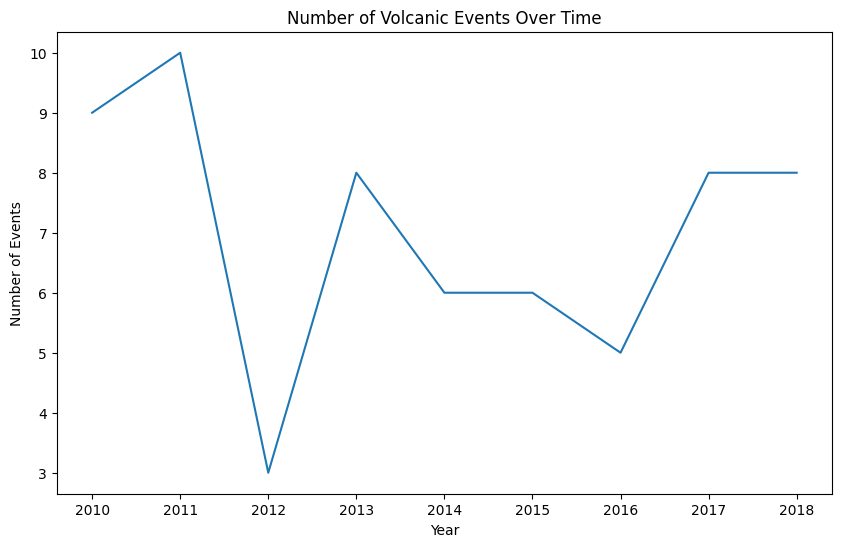

In [15]:
import matplotlib.pyplot as plt

# Plot number of volcanic events over time
plt.figure(figsize=(10, 6))
df_cleaned.groupby('Year').size().plot(kind='line')
plt.title('Number of Volcanic Events Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Events')
plt.show()

# **Geospatial Analysis**

In [16]:
import folium

# Create a map of volcano locations
map_volcanoes = folium.Map(location=[df_cleaned['Latitude'].mean(), df_cleaned['Longitude'].mean()], zoom_start=2)
for index, row in df_cleaned.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Name']).add_to(map_volcanoes)
map_volcanoes.save('volcano_map.html')

# **Categorical Variables**

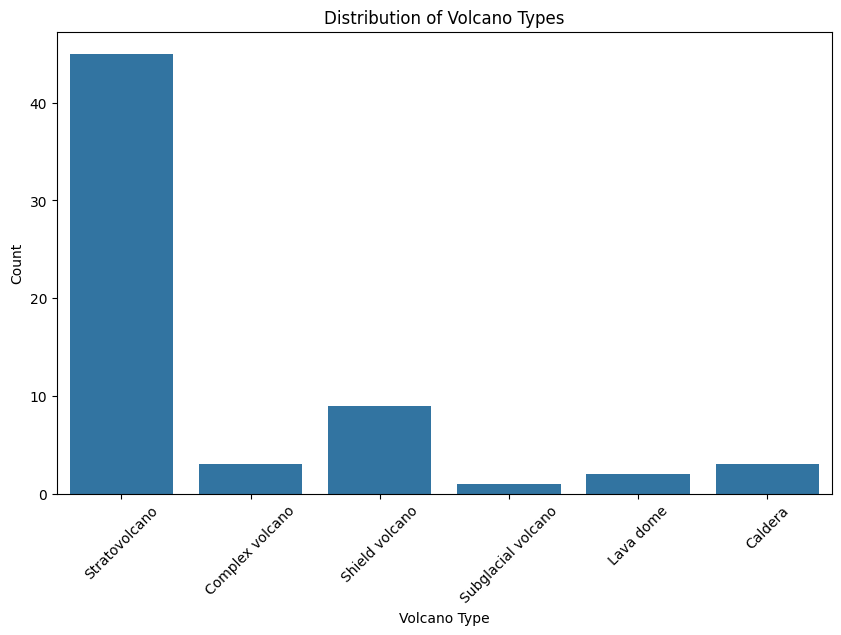

In [17]:
import seaborn as sns

# Visualize distribution of 'Type' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Type', data=df_cleaned)
plt.title('Distribution of Volcano Types')
plt.xlabel('Volcano Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Impact Analysis**

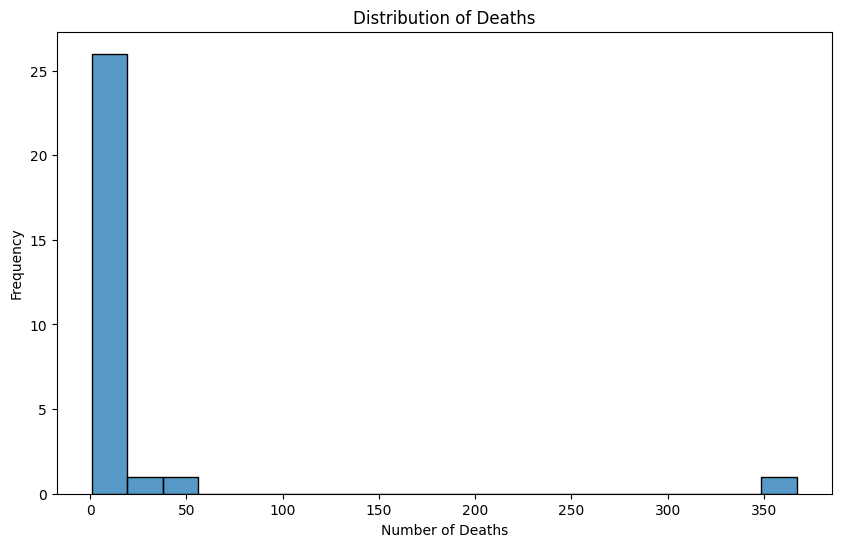

In [18]:
# Visualize distribution of 'DEATHS'
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['DEATHS'], bins=20)
plt.title('Distribution of Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('Frequency')
plt.show()

# **Text Analysis**

In [19]:
# Display unique volcano names with customized formatting
unique_names = df_cleaned['Name'].unique()
print("\033[1mUnique Volcano Names:\033[0m")  # Bold text
for name in unique_names:
    print("\033[91m{}\033[0m".format(name))  # Red font color

Unique Volcano Names:
Tungurahua
Eyjafjallajokull
Pacaya
Sarigan
Karangetang [Api Siau]
Sinabung
Merapi
Tengger Caldera
Kirishima
Bulusan
Puyehue
Nabro
Katla
Lokon-Empung
Gamalama
Kilauea
Tolbachik
Paluweh
Mayon
Ubinas
Sakura-jima
Okataina
Kelut
On-take
Fogo
Calbuco
Manam
Yellowstone
Rinjani
Aso
Etna
Fuego
Dieng Volc Complex
Campi Flegrei
Aoba
Kadovar
Kusatsu-Shirane
Ijen


# **Correlation Analysis**

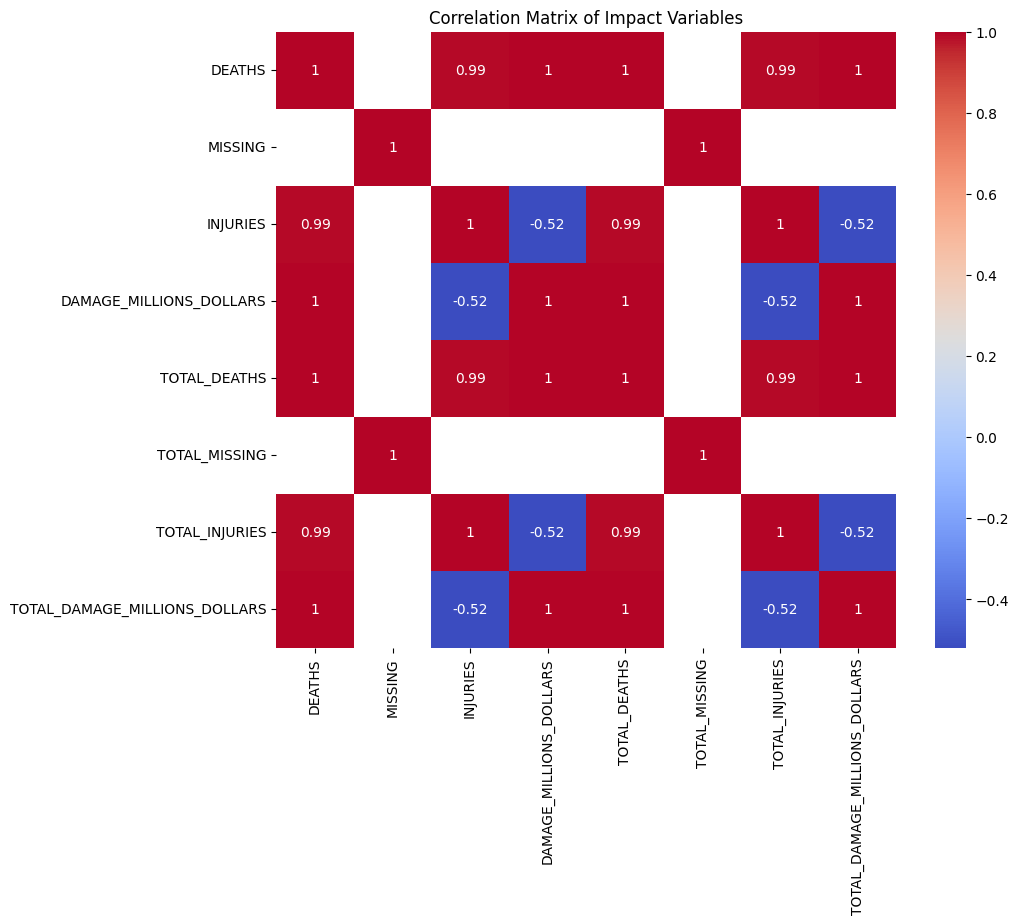

In [21]:
# Correlation analysis: Heatmap of correlations between impact variables
impact_variables = ['DEATHS', 'MISSING', 'INJURIES', 'DAMAGE_MILLIONS_DOLLARS', 'TOTAL_DEATHS',
                    'TOTAL_MISSING', 'TOTAL_INJURIES', 'TOTAL_DAMAGE_MILLIONS_DOLLARS']
impact_data = df_cleaned[impact_variables].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(impact_data, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Impact Variables')
plt.show()

# **Outlier detection**

In [22]:
# Detect outliers in 'DEATHS' using z-score
from scipy import stats

z_scores = stats.zscore(df['DEATHS'])
outliers = df[(z_scores > 3) | (z_scores < -3)]
print("Outliers:")
print(outliers)

Outliers:
Empty DataFrame
Columns: [Year, Month, Day, TSU, EQ, Name, Location, Country, Latitude, Longitude, Elevation, Type, Status, Time, VEI, Agent, DEATHS, DEATHS_DESCRIPTION, MISSING, MISSING_DESCRIPTION, INJURIES, INJURIES_DESCRIPTION, DAMAGE_MILLIONS_DOLLARS, DAMAGE_DESCRIPTION, HOUSES_DESTROYED, HOUSES_DESTROYED_DESCRIPTION, TOTAL_DEATHS, TOTAL_DEATHS_DESCRIPTION, TOTAL_MISSING, TOTAL_MISSING_DESCRIPTION, TOTAL_INJURIES, TOTAL_INJURIES_DESCRIPTION, TOTAL_DAMAGE_MILLIONS_DOLLARS, TOTAL_DAMAGE_DESCRIPTION, TOTAL_HOUSES_DESTROYED, TOTAL_HOUSES_DESTROYED_DESCRIPTION]
Index: []

[0 rows x 36 columns]


# **Interactive visualisation**

In [30]:
import plotly.express as px

# Create the interactive scatter plot
fig = px.scatter(df_cleaned, x='DEATHS', y='DAMAGE_MILLIONS_DOLLARS', color='Type', hover_name='Name')
fig.update_layout(title='Volcano Impact: Deaths vs Damage (Millions of Dollars)',
                  xaxis_title='Number of Deaths',
                  yaxis_title='Damage (Millions of Dollars)')

# Save the scatter plot to an HTML file
fig.write_html('volcano_impact_analysis.html')

# **Data Visualisation**

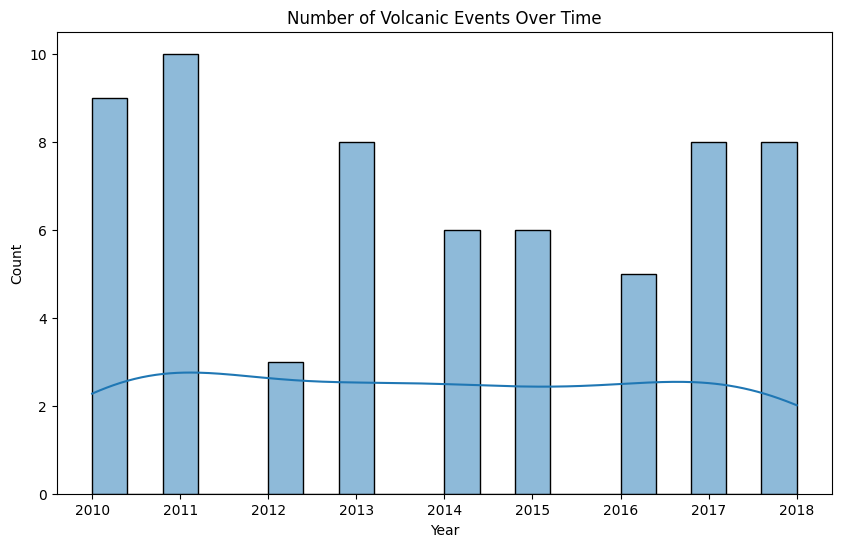

In [25]:
# Temporal trends: Number of volcanic events over time
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned, x='Year', bins=20, kde=True)
plt.title('Number of Volcanic Events Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [28]:
import plotly.express as px

# Create the map
fig = px.scatter_geo(df_cleaned, lat='Latitude', lon='Longitude', hover_name='Name', scope='world')
fig.update_geos(showcountries=True, countrycolor='black', countrywidth=0.5)
fig.update_layout(title='Geographical Distribution of Volcanoes')

# Save the map to an HTML file
fig.write_html('volcano_geographical_distribution.html')

In [29]:
import plotly.express as px

# Create the scatter plot
fig = px.scatter(df_cleaned, x='DEATHS', y='DAMAGE_MILLIONS_DOLLARS', color='Type', hover_name='Name')
fig.update_layout(title='Impact of Volcanic Events: Deaths vs. Damage (Millions of Dollars)',
                  xaxis_title='Number of Deaths',
                  yaxis_title='Damage (Millions of Dollars)')

# Save the scatter plot to an HTML file
fig.write_html('volcano_impact_analysis.html')